<a href="https://colab.research.google.com/github/induuu18/heart-risk-predictor/blob/main/Heart-Risk-Prediction-Using-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import io

In [ ]:
import pandas as pd
file_path = 'synthetic_heart_disease_risk_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)
print(data.head())

   Age  Gender  Cholesterol  Blood_Pressure Smoking Diabetes  \
0   67  Female          217             129     Yes       No   
1   57  Female          184             136     Yes       No   
2   43  Female          186             124     Yes       No   
3   71  Female          183             124      No       No   
4   36  Female          202             123      No       No   

   Heart_Disease_Risk  
0                   1  
1                   1  
2                   0  
3                   0  
4                   0  


In [ ]:
print(f'Dataset shape: {data.shape}')

Dataset shape: (1000, 7)


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Smoking'] = data['Smoking'].map({'No': 0, 'Yes': 1})
data['Diabetes'] = data['Diabetes'].map({'No': 0, 'Yes': 1})

X = data.drop('Heart_Disease_Risk', axis=1)
y = data['Heart_Disease_Risk']

print("Original class distribution:")
print(y.value_counts())


Original class distribution:
Heart_Disease_Risk
0    700
1    300
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())



Class distribution in training set:
Heart_Disease_Risk
0    560
1    240
Name: count, dtype: int64

Class distribution in testing set:
Heart_Disease_Risk
0    140
1     60
Name: count, dtype: int64


In [ ]:
if y_train.nunique() > 1:
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    print("\nClass distribution after SMOTE:")
    print(pd.Series(y_train_smote).value_counts())
else:
    print("\nOnly one class present in the training set. SMOTE will not be applied.")
    X_train_smote, y_train_smote = X_train, y_train



Class distribution after SMOTE:
Heart_Disease_Risk
1    560
0    560
Name: count, dtype: int64


In [ ]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'\nAccuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)


Accuracy: 0.89

Confusion Matrix:
 [[118  22]
 [  0  60]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       140
           1       0.73      1.00      0.85        60

    accuracy                           0.89       200
   macro avg       0.87      0.92      0.88       200
weighted avg       0.92      0.89      0.89       200



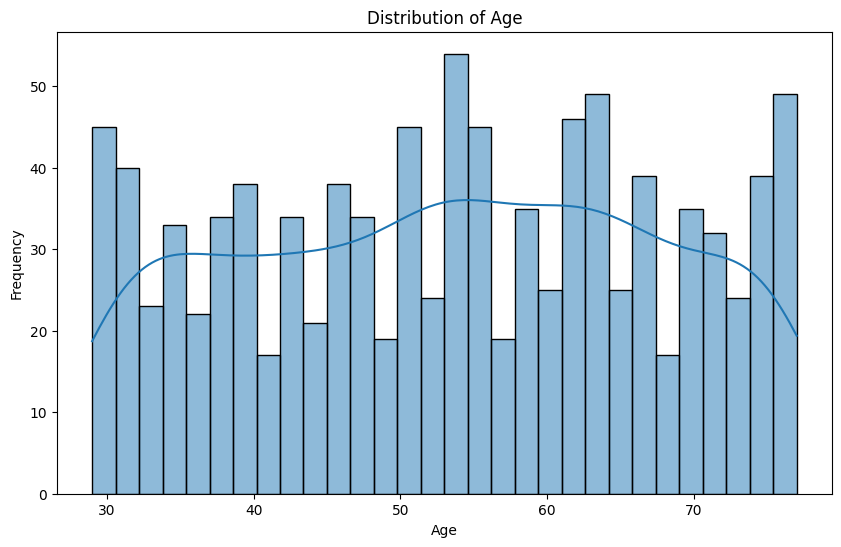

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

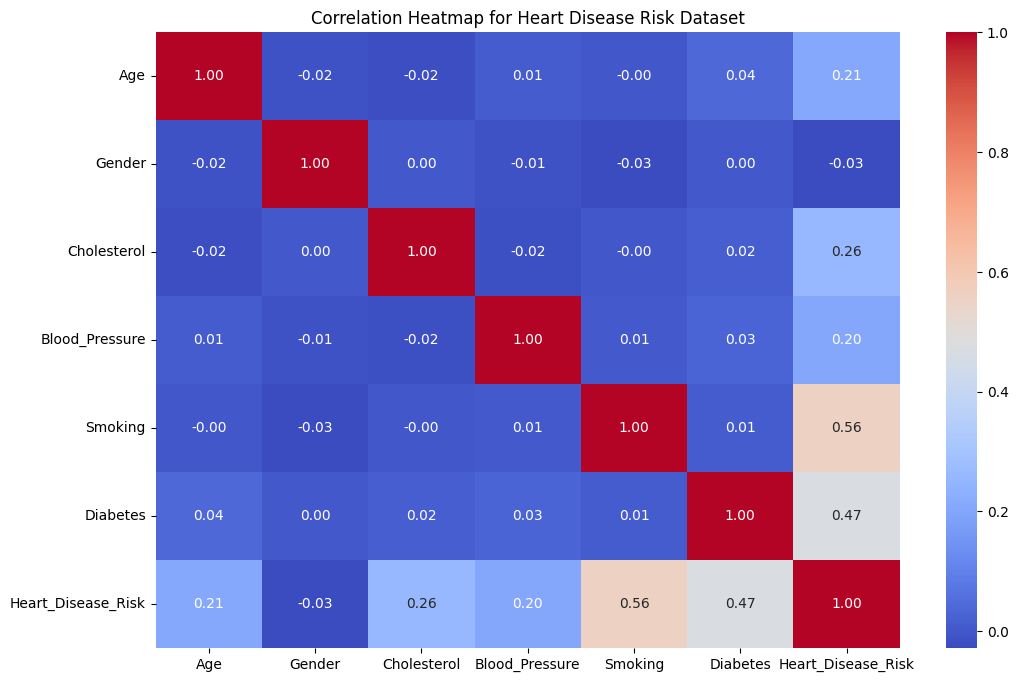

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Heart Disease Risk Dataset')
plt.show()

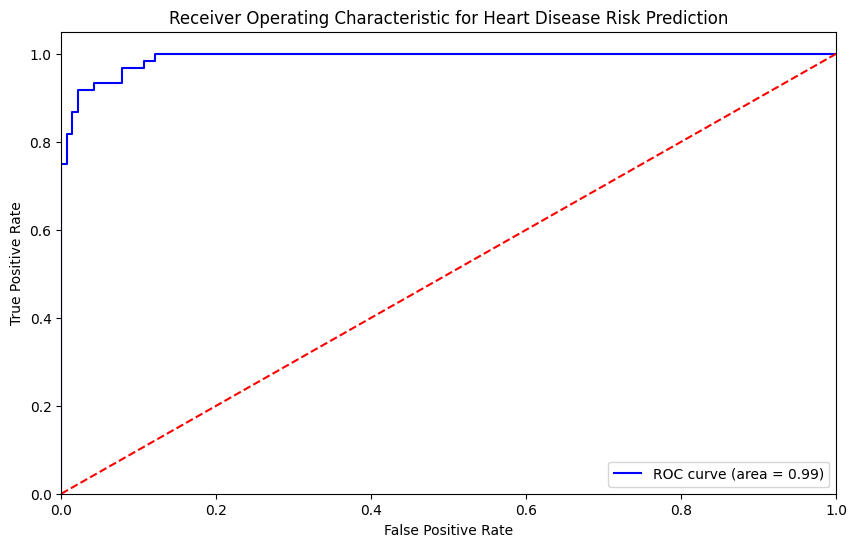

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of high risk
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Heart Disease Risk Prediction')
plt.legend(loc='lower right')
plt.show()